# 模型验证方法

#1 通过交叉验证计算得分
```
model_selection.cross_val_score(estimator,x)
```
estimator是一个实现了fit函数的学习器。有多少个交叉验证，就会返回多少个得分

可以看到过了$10^{-4}$，CV得分会突然增大，所以我们应该选择大于$10^{-4}$的某一个值，而不是其它

参数列表长度 10


/anaconda/lib/python3.5/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/anaconda/lib/python3.5/site-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


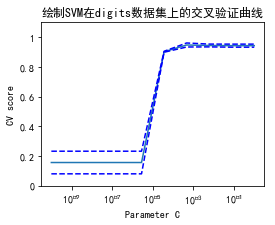

In [1]:
import numpy as np
from sklearn import model_selection, datasets, svm
import matplotlib.pyplot as plt

digits = datasets.load_digits()
x,y = digits.data, digits.target
svc = svm.SVC(kernel='linear')
c_s = np.logspace(-10, 0, 10)
print('参数列表长度', len(c_s))
scores_std = list()
scores = list()
for c in c_s:
    svc.C = c
    this_scores = model_selection.cross_val_score(svc, x, y, n_jobs=4)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
plt.figure(1, figsize=(4,3))
plt.clf()
plt.semilogx(c_s, scores)
plt.semilogx(c_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(c_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: '%g' % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0,1.1)
plt.title('绘制SVM在digits数据集上的交叉验证曲线')
plt.show()

#2 对每个输入数据点产生交叉验证估计
```
model_selection.cross_val_predict(estimator,x)
```

In [2]:
from sklearn import datasets,linear_model,model_selection

diabetes = datasets.load_diabetes()
x = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
y_pred = model_selection.cross_val_predict(lasso, x, y)
print(y_pred)
# 如果调用lasso.predict，那么就没有交叉验证的过程了

[ 174.26933996  117.6539241   164.60228641  155.65049088  132.68647979
  128.49511245  120.76146877  141.069413    164.18904498  182.37394949
  111.04181265  127.94311443  135.0869234   162.83066014  135.3573514
  157.64516523  178.95843326  163.3919841   143.85237903  144.29748882
  133.58117218  124.77928571  132.90918003  208.52927     153.61908967
  154.16616341  118.95351821  163.50467541  145.89406196  168.3308101
  155.87411031  123.45960148  185.70459144  133.38468582  117.2789469
  150.27895019  174.1541028   160.03235091  192.31389633  161.58568256
  154.2224809   119.35517679  146.15706413  133.82056934  179.68118754
  137.96619936  146.07788398  126.77579723  123.32101099  166.26710247
  146.41559964  161.67261029  147.47731459  138.44595305  144.85421048
  113.77990664  185.54970402  115.31624749  142.23672103  171.07792136
  132.5394716   177.80524864  116.5616502   134.25230846  142.88707475
  173.2830912   154.31273504  149.16680759  144.88238997  121.97783103
  110.384

#3 计算并绘制模型的学习率曲线
```
model_selection.learning_curve(estimator, x, y)
```
计算指定的学习器模型在不同大小的训练集上经过交叉验证的训练得分和测试得分。
1. 用一个交叉验证生成器划分整体数据集K次，每一次划分都有一个训练集和测试集
2. 从第K次的训练集中难处若干个数量不断增加的子集，在这些子训练集上训练模型
3. 计算模型在对应的子训练集和测试集熵的得分
4. 对于在每种子训练集大小下，将K次训练集得分和测试集得分分别进行平均

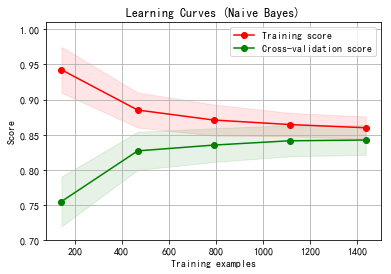

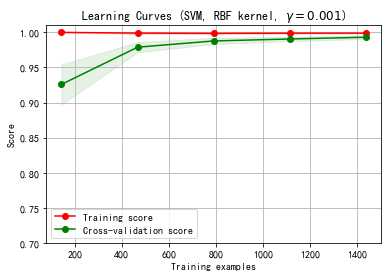

In [3]:
# 绘制学习器的交叉验证学习率曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn import naive_bayes, svm, datasets, model_selection

def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = model_selection.learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    return plt
digits = datasets.load_digits()
x, y = digits.data, digits.target
title = 'Learning Curves (Naive Bayes)'
cv = model_selection.ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = naive_bayes.GaussianNB()
plot_learning_curve(estimator, title, x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title="Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = svm.SVC(gamma=0.001)
plot_learning_curve(estimator, title, x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

#4 计算并绘制模型的验证曲线
```
model_selection.validation_curve(estimator,...)
```
当某个参数不断变化时，在每一个取值上计算出的模型在训练集和测试集上的得分。

/anaconda/lib/python3.5/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/anaconda/lib/python3.5/site-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


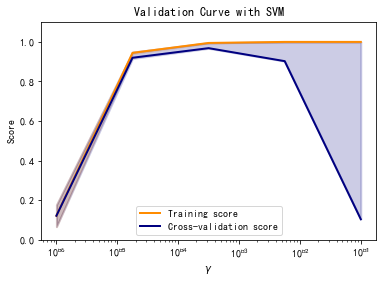

In [4]:
#绘制SVM学习器模型的验证曲线
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, model_selection
digits = datasets.load_digits()
x,y = digits.data,digits.target

param_range = np.logspace(-6,-1,5)
train_scores, test_scores = model_selection.validation_curve(svm.SVC(), x, y, param_name='gamma', param_range=param_range,
                                                             cv=10,scoring='accuracy', n_jobs=4)
train_scores_mean = np.mean(train_scores, axis=1) #axis=1 表示按行
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$')
plt.ylabel('Score')
plt.ylim(0.0,1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label='Training score', color='darkorange',lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.2,color='darkorange',lw=lw)
plt.semilogx(param_range, test_scores_mean, label='Cross-validation score', color='navy',lw=lw)
plt.fill_between(param_range, test_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.2,color='navy',lw=lw)
plt.legend(loc='best')
plt.show()

##3.5 通过排序评估交叉验证得分的重要性
```
model_selection.permutation_test_score(...)
```